#Spam Detection

In [1]:
#Importing pandas and numoy library
import numpy as np 
import pandas as pd 
import nltk

In [52]:
#Loading and processing Datas
data = pd.read_csv('spam.csv',encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"sms"})
data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
#Adding new column to the dataset for length of SMS
data['length'] = data['sms'].apply(len)
data.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [54]:
#Importing Matplotlib library.
import matplotlib.pyplot as plt
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa09107d510>,
      dtype=object)

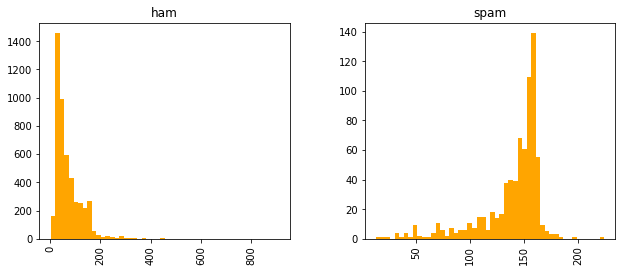

In [55]:
#Plotting the histogram
data.hist(column='length', by='label', bins=50,figsize=(10,4),color="orange")

In [56]:
data

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [57]:
#labelling the Ham and Spam by 0 and 1
data.loc[:,'label'] = data.label.map({'ham':0, 'spam':1})
data.head()

,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#Importing Libraries
import string
import pprint
from collections import Counter
from collections import Counter

In [70]:
#Defining a function to return the frequency of words in documents
def frequency(documents):
    lower_case_documents = []
    lower_case_documents = [d.lower() for d in documents]
    sans_punctuation_documents = []
    for i in lower_case_documents:
        sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation))) 
    preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
    frequency_list = []
    frequency_list = [Counter(d) for d in preprocessed_documents]
    return lower_case_documents,preprocessed_documents,frequency_list

In [71]:
#The documents variable contains list of documents
documents = ['Hello, how are you!','Win money, win from home.','Call me now.','Hello, Call hello you tomorrow?']

In [74]:
#Extracting the data using the above function
lower_case_documents,preprocessed_documents,frequency_list=frequency(documents)
frequency_list

[Counter({'are': 1, 'hello': 1, 'how': 1, 'you': 1}),
 Counter({'from': 1, 'home': 1, 'money': 1, 'win': 2}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'call': 1, 'hello': 2, 'tomorrow': 1, 'you': 1})]

In [79]:
#Importing countervectorizer module from sklearn library
from sklearn.feature_extraction.text import CountVectorizer
count_vec= CountVectorizer()

In [80]:
#Fitting the model to the vector
count_vec.fit(documents)
count_vec.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [81]:
#Converting the vector into array
doc_array = count_vec.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [82]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vec.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [84]:
#Importing train test split from sklearn
from sklearn.model_selection import train_test_split

In [85]:
#Splitting the training and test dataset
X_train, X_test, y_train, y_test = train_test_split(data['sms'],data['label'],test_size=0.20,random_state=1)
# Fitting the training data and then return the matrix
training_data = count_vec.fit_transform(X_train)
# Transforming testing data and return the matrix. 
testing_data = count_vec.transform(X_test)

In [86]:
#Importing Naivebayes from sklearn
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

In [88]:
#Training the model
naive_bayes.fit(training_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [95]:
#Predicting the model using test data
predictions = naive_bayes.predict(testing_data)

In [96]:
#Importing accuracy score and precision score from sklearn library and printing the precision
from sklearn.metrics import accuracy_score, precision_score
print('Accuracy score : {}'.format(accuracy_score(y_test, predictions)))
print('Precision score : {}'.format(precision_score(y_test, predictions)))

Accuracy score : 0.9847533632286996
Precision score : 0.9420289855072463
